# 1. Import libraries

In [2]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Importing libraries, especially BeautifulSoup and pandas.

# 2. Read the webpage & prase it with BeautifulSoup

In [3]:
opened_webpage = requests.get("https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Copy and paste link of selected website so that the library can read thorough the webpage. <br />
Also, prasing the webpage with BeautifulSoup. 

# 3. Extract the raw data from the website

In [4]:
raw_data = []

table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

["Rank\nTitle\nWorldwide Lifetime Gross\nDomestic Lifetime Gross\nDomestic %\nForeign Lifetime Gross\nForeign %\nYear\n1Avatar$2,923,706,026$785,221,64926.9%$2,138,484,37773.1%20092Avengers: Endgame$2,799,439,100$858,373,00030.7%$1,941,066,10069.3%20193Avatar: The Way of Water$2,268,388,003$666,325,81629.4%$1,602,062,18770.6%20224Titanic$2,254,271,285$673,995,82929.9%$1,580,275,45670.1%19975Star Wars: Episode VII - The Force Awakens$2,071,310,218$936,662,22545.2%$1,134,647,99354.8%20156Avengers: Infinity War$2,052,415,039$678,815,48233.1%$1,373,599,55766.9%20187Spider-Man: No Way Home$1,921,847,111$814,115,07042.4%$1,107,732,04157.6%20218Jurassic World$1,671,537,444$653,406,62539.1%$1,018,130,81960.9%20159The Lion King$1,663,075,401$543,638,04332.7%$1,119,437,35867.3%201910The Avengers$1,520,538,536$623,357,91041%$897,180,62659%201211Furious 7$1,515,341,399$353,007,02023.3%$1,162,334,37976.7%201512Top Gun: Maverick$1,493,491,858$718,732,82148.1%$774,759,03751.9%202213Frozen II$1,453,68

The first step of ETL. <br />
Based on the webpage I selected above, I extracted raw data of the webpage with the word "table." <br />
Then, I printed the all raw data. 

# 4. Transform the raw data to Dataframe

In [5]:
import pandas as pd

url = "https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW"
table = pd.read_html(url)[0]
df = pd.DataFrame(table)
print(df)

     Rank                                       Title  \
0       1                                      Avatar   
1       2                           Avengers: Endgame   
2       3                    Avatar: The Way of Water   
3       4                                     Titanic   
4       5  Star Wars: Episode VII - The Force Awakens   
..    ...                                         ...   
195   196                                  Armageddon   
196   197                      The Day After Tomorrow   
197   198                                         Ted   
198   199                             American Sniper   
199   200                      Mission: Impossible II   

    Worldwide Lifetime Gross Domestic Lifetime Gross Domestic %  \
0             $2,923,706,026            $785,221,649      26.9%   
1             $2,799,439,100            $858,373,000      30.7%   
2             $2,268,388,003            $666,325,816      29.4%   
3             $2,254,271,285            $673,99

I extracted the raw data in the previous stage. <br />
Now, it is the second step, transforming the raw data to data frame. Even though it is not the CSV format, the data is much more organized compare to raw data as you can see above. 

# 5. Save the Dataframe as CSV file

In [6]:
df.to_csv("assignment7_movie.csv")

This is the last step of ETL, 'load.' <br />
I stored the data frame as CSV file in order to visualize it later.

# 6. Load the CSV file I created

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

movie_df = pd.read_csv("assignment7_movie.csv")

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                200 non-null    int64 
 1   Rank                      200 non-null    int64 
 2   Title                     200 non-null    object
 3   Worldwide Lifetime Gross  200 non-null    object
 4   Domestic Lifetime Gross   200 non-null    object
 5   Domestic %                200 non-null    object
 6   Foreign Lifetime Gross    200 non-null    object
 7   Foreign %                 200 non-null    object
 8   Year                      200 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 14.2+ KB


Since we saved the data frame as a form of CSV file, now I can call it and check the general information about it.

In [12]:
movie_df.head()

,Unnamed: 0,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,0,1,Avatar,"$2,923,706,026","$785,221,649",26.9%,"$2,138,484,377",73.1%,2009
1,1,2,Avengers: Endgame,"$2,799,439,100","$858,373,000",30.7%,"$1,941,066,100",69.3%,2019
2,2,3,Avatar: The Way of Water,"$2,268,388,003","$666,325,816",29.4%,"$1,602,062,187",70.6%,2022
3,3,4,Titanic,"$2,254,271,285","$673,995,829",29.9%,"$1,580,275,456",70.1%,1997
4,4,5,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218","$936,662,225",45.2%,"$1,134,647,993",54.8%,2015


This cell is just for the checking that either my CSV file is successfully loaded or not. <br />
The CSV file is successfully loaded. 

# 7. Descriptive Stats

In [13]:
wlg = movie_df["Worldwide Lifetime Gross"]
print (wlg)

wlg.describe()

0      $2,923,706,026
1      $2,799,439,100
2      $2,268,388,003
3      $2,254,271,285
4      $2,071,310,218
            ...      
195      $553,709,788
196      $552,639,571
197      $549,368,315
198      $547,459,020
199      $546,388,108
Name: Worldwide Lifetime Gross, Length: 200, dtype: object


count                200
unique               200
top       $2,923,706,026
freq                   1
Name: Worldwide Lifetime Gross, dtype: object

This is the descriptive statistics of "Worldwide Lifetime Gross." <br />

# 8. Data Visualization 

## Histogram

count     200.000000
mean     2011.770000
std         7.208112
min      1977.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: Year, dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'The Best Movie Year')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Frequency')

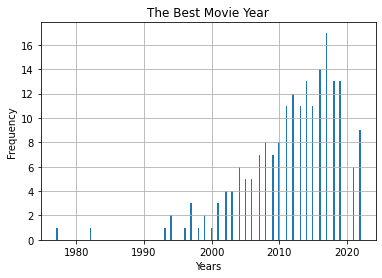

In [14]:
import matplotlib.pyplot as plt

year = movie_df["Year"]
year.describe()
year.hist(bins=len(year))

plt.title('The Best Movie Year')
plt.xlabel('Years')
plt.ylabel('Frequency')

Since I would like to compare the year and the frequency, I decided to use histogram rather than bar graph. <br />
Importing `matplotlib.pyplot` is essential before visualizing your data. <br />
The length of the bins is as the same as the length of `year` <br />
Since the title, labels of x and y axises are significant, I added them with `plt.title`, `plt.xlabel`, and `plt.ylabel`

**Short insight** <br />
Since total of 17 movies were released in 2017 among the best 200 top lifetime gross movies, we are able to say 2017 was one of the most successful year in film industry. More details in README and data.world.